In [1]:
# previous seminar was about numpy
import numpy

# we already learnt something from sklearn
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

# today we learn about pandas
import pandas

## Plotting in Jupyter with matplotlib

below we use a **magic function**. It is a term!


In [2]:
import matplotlib.pyplot as plt
# magic says: activate matplotlib, show plots inline
%matplotlib inline 

In [3]:
x = numpy.array([-3, -1.5, 0, 1, 3, 4])

print x
print x ** 2 # squared each element

[-3.  -1.5  0.   1.   3.   4. ]
[  9.     2.25   0.     1.     9.    16.  ]


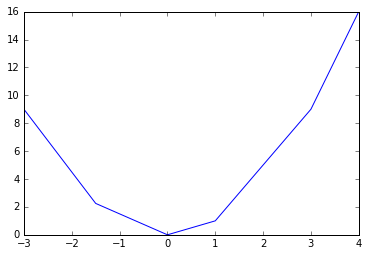

In [4]:
plt.plot(x, x ** 2)

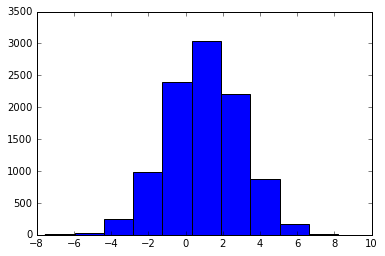

In [5]:
distribution = numpy.random.normal(loc=1., scale=2, size=10000)
plt.hist(distribution)
pass # it is the way to suppress printing output of last line. pass = 'do nothing'

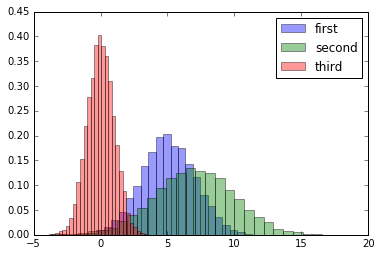

In [6]:
plt.hist(numpy.random.normal(loc=5., scale=2, size=10000), bins=30, alpha=0.4, normed=True, label='first')
plt.hist(numpy.random.normal(loc=7., scale=3, size=10000), bins=30, alpha=0.4, normed=True, label='second')
plt.hist(numpy.random.normal(loc=0., scale=1, size=10000), bins=30, alpha=0.4, normed=True, label='third')
plt.legend()
pass

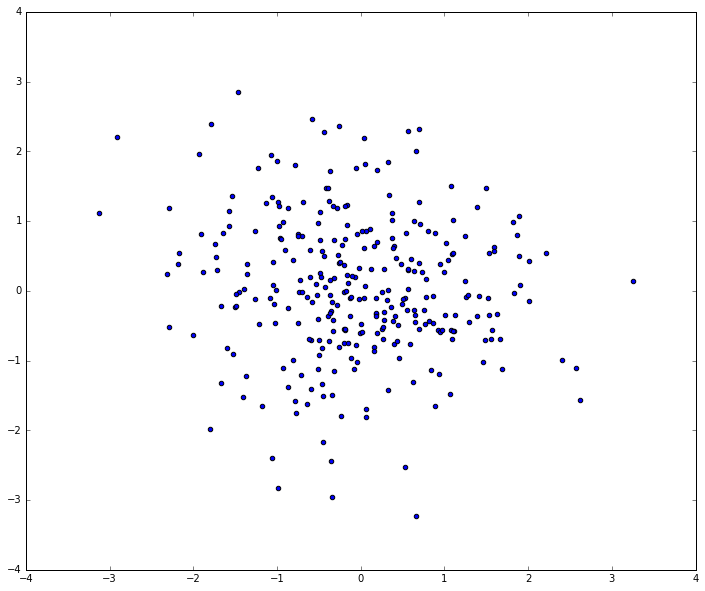

In [7]:
# Large scatter plot
plt.figure(figsize=[12, 10])
plt.scatter(numpy.random.normal(size=300), numpy.random.normal(size=300))

## Magics

magics are not needed so far, those are just for the information

In [8]:
# sample two arrays of random numbers sampled from uniform [0, 1]
a = numpy.random.random(size=1000000)
%time b = numpy.random.random(size=1000000)
# measure time needed for operation
%time result = a + b

CPU times: user 8.33 ms, sys: 20.6 ms, total: 29 ms
Wall time: 13.7 ms
CPU times: user 4.13 ms, sys: 0 ns, total: 4.13 ms
Wall time: 4.2 ms


In [9]:
%%time
# measure the time needed to run whole cell (%%, not %)
a = numpy.random.random(size=1000000)
b = numpy.random.random(size=1000000)
result = a + b

CPU times: user 24.2 ms, sys: 7.35 ms, total: 31.5 ms
Wall time: 31.4 ms


In [10]:
%%prun 
# profiling of complex code
numpy.histogram(x)

In [11]:
# general info about magics in Jupyter
%magic

# Hello Pandas

Looking at the data

In [12]:
!head data/2-winequality-white.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6


In [13]:
data = pandas.read_csv('data/2-winequality-white.csv', sep=';')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30,136,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11.0,6


In [14]:
# split into description and target
y = data['quality']
X = data.drop('quality', axis=1)

In [15]:
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30,136,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11.0


## Operations on data with pandas

In [16]:
#leaving only 8 rows for testing
test_frame = data[:8].copy()

In [17]:
test_frame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30,136,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6


In [18]:
test_frame['density']

0    1.0010
1    0.9940
2    0.9951
3    0.9956
4    0.9956
5    0.9951
6    0.9949
7    1.0010
Name: density, dtype: float64

In [19]:
# converting to numpy.array with .values
test_frame['density'].values

array([ 1.001 ,  0.994 ,  0.9951,  0.9956,  0.9956,  0.9951,  0.9949,
        1.001 ])

In [20]:
test_frame['fixed acidity'][:5]

0    7.0
1    6.3
2    8.1
3    7.2
4    7.2
Name: fixed acidity, dtype: float64

In [21]:
# indexing with numbers - iloc
test_frame.iloc[[0, 4, 7], 2:7]

,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide
0,0.36,20.7,0.045,45,170
4,0.32,8.5,0.058,47,186
7,0.36,20.7,0.045,45,170


In [22]:
# indexing with named labels - loc
test_frame.loc[:, ['volatile acidity', 'fixed acidity']]

,volatile acidity,fixed acidity
0,0.27,7.0
1,0.30,6.3
2,0.28,8.1
3,0.23,7.2
4,0.23,7.2
5,0.28,8.1
6,0.32,6.2
7,0.27,7.0


In [23]:
# shortcut for previous
test_frame[['volatile acidity', 'fixed acidity']]

,volatile acidity,fixed acidity
0,0.27,7.0
1,0.30,6.3
2,0.28,8.1
3,0.23,7.2
4,0.23,7.2
5,0.28,8.1
6,0.32,6.2
7,0.27,7.0


In [24]:
# [start:end:step], some of arguments can be omitted.
test_frame.iloc[::3, ::-1]

,quality,alcohol,sulphates,pH,density,total sulfur dioxide,free sulfur dioxide,chlorides,residual sugar,citric acid,volatile acidity,fixed acidity
0,6,8.8,0.45,3.00,1.0010,170,45,0.045,20.7,0.36,0.27,7.0
3,6,9.9,0.40,3.19,0.9956,186,47,0.058,8.5,0.32,0.23,7.2
6,6,9.6,0.47,3.18,0.9949,136,30,0.045,7.0,0.16,0.32,6.2


In [25]:
# adding new feature with vector operation
test_frame['dioxide sum'] = test_frame['total sulfur dioxide'] + test_frame['free sulfur dioxide']
test_frame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,dioxide sum
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,215
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,146
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,127
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,233
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,233
5,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,127
6,6.2,0.32,0.16,7.0,0.045,30,136,0.9949,3.18,0.47,9.6,6,166
7,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,215


In [26]:
# filtering dataset
filtered_data = data[data['density'] < 0.988]
filtered_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2945,4.9,0.330,0.31,1.2,0.016,39,150,0.98713,3.33,0.59,14.00,8
3367,6.0,0.290,0.25,1.4,0.033,30,114,0.98794,3.08,0.43,13.20,6
3370,6.0,0.290,0.25,1.4,0.033,30,114,0.98794,3.08,0.43,13.20,6
3673,5.4,0.300,0.30,1.2,0.029,25,93,0.98742,3.31,0.40,13.60,7
3676,5.3,0.300,0.30,1.2,0.029,25,93,0.98742,3.31,0.40,13.60,7
3710,4.7,0.670,0.09,1.0,0.020,5,9,0.98722,3.30,0.34,13.60,5
3773,5.0,0.610,0.12,1.3,0.009,65,100,0.98740,3.26,0.37,13.50,5
3904,5.0,0.455,0.18,1.9,0.036,33,106,0.98746,3.21,0.83,14.00,7
3915,4.7,0.455,0.18,1.9,0.036,33,106,0.98746,3.21,0.83,14.00,7
3918,6.4,0.350,0.28,1.6,0.037,31,113,0.98779,3.12,0.40,14.20,7


In [27]:
print len(test_frame)
print test_frame.shape 
print test_frame.columns

8
(8, 13)
Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality', u'dioxide sum'],
      dtype='object')


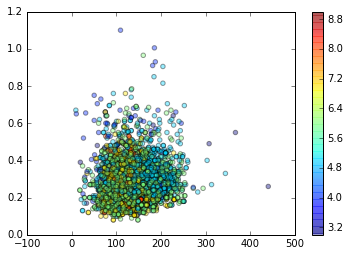

In [28]:
plt.scatter(X['total sulfur dioxide'], X['volatile acidity'], c=y, alpha=0.4)
plt.colorbar()

## Exercises

### Exercise 1
plot histograms of all features in the dataset

### Exercise 2
Let's classify wines in:
   * good means quality >= 7
   * bad means quality <= 4
   * mediocre means quality five or six
   
Plot histograms of all features for good and bad wines. Which feature is the most discriminative?
   

### Exercise 3   
Plot some scatter plots:
   - alcohol vs fixed acidity for good and bad wines, what can we say about good wines?
   - alcohol vs fixed acidity for quality=5 and quality=6
   - alcohol vs density for good and bad wines. What can we conclude?

## Linear models (complete exercises first!)

computing mean squares error, desire smaller values

In [29]:
trainX, testX, trainY, testY = train_test_split(X, y, random_state=42)

In [30]:
for alpha in [0., 0.001, 0.01, 0.1, 1, 10, 100]:
    linear_reg = Ridge(alpha=alpha)
    linear_reg.fit(trainX, trainY)
    print alpha, '\t', mean_squared_error(testY, linear_reg.predict(testX))

0.0 	0.564587791519
0.001 	0.568293991144
0.01 	0.573570550784
0.1 	0.574990791682
1 	0.575287625141
10 	0.576469007479
100 	0.593064358623


## Linear models with nonlinear features

In [31]:
from sklearn.preprocessing import StandardScaler
# first, standatize all features by scaling (mean = 0, std = 1)
X_extend = StandardScaler().fit_transform(X)
X_extend = pandas.DataFrame(X_extend, columns=X.columns)

In [32]:
for f in X_extend.columns:
    X_extend[f + '_abs']  = numpy.abs(X_extend[f])
    X_extend[f + '_tanh'] = numpy.tanh(X_extend[f])

In [33]:
X_extend.shape

(4898, 33)

In [34]:
trainX_ex, testX_ex = train_test_split(X_extend, random_state=42)

In [35]:
for alpha in [0., 0.001, 0.01, 0.1, 1, 10, 100]:
    linear_reg = Ridge(alpha)
    linear_reg.fit(trainX_ex, trainY)
    print alpha, '\t', mean_squared_error(testY, linear_reg.predict(testX_ex))

0.0 	0.516931032212
0.001 	0.516931019462
0.01 	0.516930904672
0.1 	0.516929753694
1 	0.516918023577
10 	0.516826197999
100 	0.518524350888


# References 
1. [matplotlib gallery](http://matplotlib.org/gallery.html)
2. [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
    * almost any question about these tools is already answered on stackoverflow